In [ ]:
src = '/content/mnist-original.mat'

In [ ]:
# loading data
from scipy.io import loadmat

mnist = loadmat(src)
X = mnist["data"].T
y = mnist["label"][0]

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [ ]:
# getting image dimensions
X.shape

(70000, 784)

In [ ]:
# reshaping the data to (number of samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

In [ ]:
# normalizing the pixel values to range [0, 1]
X = X / 255.0

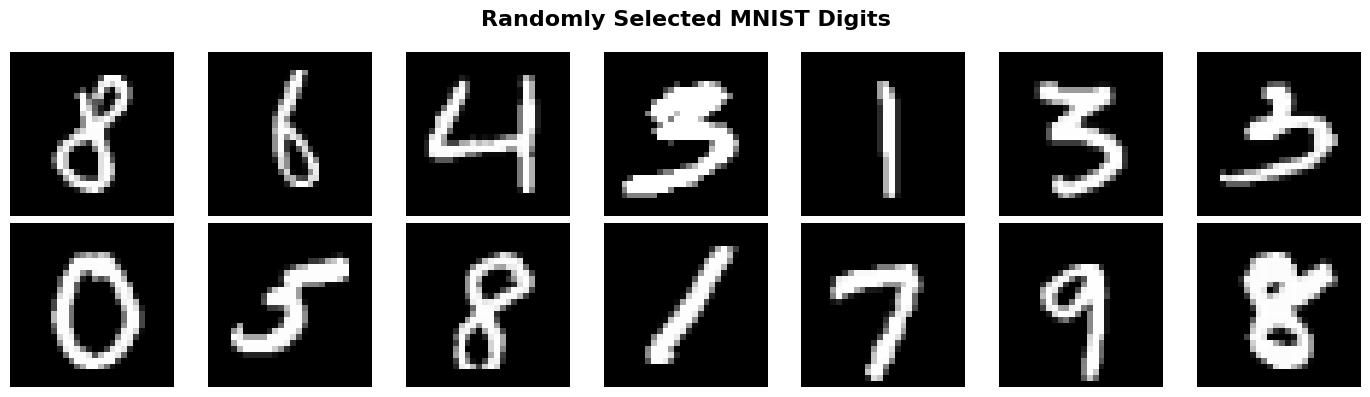

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generating 10 random indices
random_indices = np.random.choice(X.shape[0], 14, replace=False)

# creating a 2x5 subplot
fig, axes = plt.subplots(2, 7, figsize=(14, 4))

for i, ax in enumerate(axes.flat):

    # plotting each digit
    ax.imshow(X[random_indices[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')

# adding a title over the entire plot
fig.suptitle('Randomly Selected MNIST Digits', fontsize=16, fontweight = 'bold')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assume X and y are your original dataset arrays
num_samples_to_remove = 14

# Get the total number of samples in the dataset
total_samples = len(X)

# Randomly choose 14 indices from the dataset
random_indices = np.random.choice(total_samples, num_samples_to_remove, replace=False)

# Extract the selected images and labels for final testing of the model
X_final = X[random_indices]
y_final = y[random_indices]

# Remove the selected images and labels from the original dataset
X_remaining = np.delete(X, random_indices, axis=0)
y_remaining = np.delete(y, random_indices, axis=0)

# Split the remaining dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

# Set device placement logging
tf.debugging.set_log_device_placement(True)

# Check available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

# Ensure GPU is available
if not tf.config.list_physical_devices('GPU'):
    raise RuntimeError('No GPU device found.')

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8409 - loss: 0.5163 - val_accuracy: 0.9796 - val_loss: 0.0660
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9829 - loss: 0.0527 - val_accuracy: 0.9853 - val_loss: 0.0477
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9899 - val_loss: 0.0348
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9888 - val_loss: 0.0373
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9887 - val_loss: 0.0352
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9892 - val_loss: 0.0360
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9941 - loss: 0.0157 - val_accuracy: 0.9904 - val_loss: 0.0350
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9971 - loss: 0.0089 - val_accuracy:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,368,608 (5.22 MB)

 Trainable params: 456,202 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 912,406 (3.48 MB)

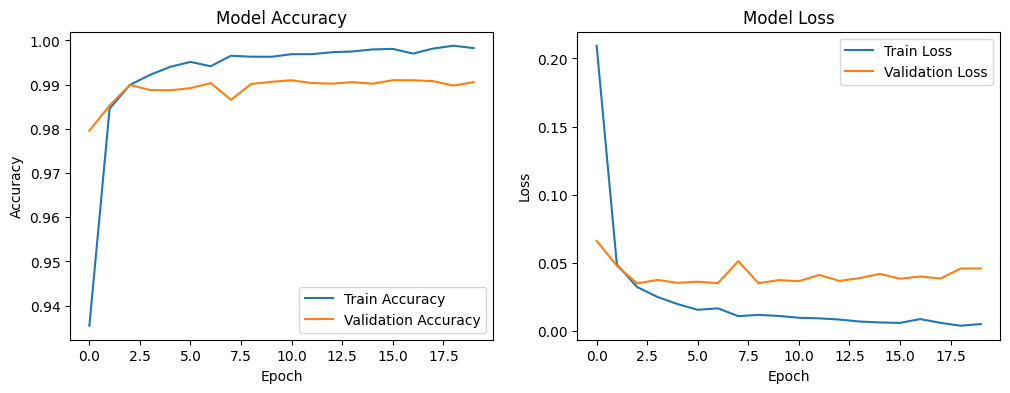

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1371
           1       0.99      1.00      0.99      1558
           2       0.99      0.99      0.99      1397
           3       1.00      0.99      0.99      1406
           4       0.99      0.98      0.99      1411
           5       0.99      0.99      0.99      1293
           6       0.99      0.98      0.99      1384
           7       0.99      0.99      0.99      1449
           8       1.00      0.99      0.99      1386
           9       0.97      0.99      0.98      1343

    accuracy                           0.99     13998
   macro avg       0.99      0.99      0.99     13998
weighted avg       0.99      0.99      0.99     13998



In [ ]:
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report

tf.debugging.set_log_device_placement(False)

# converting data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Define your model here
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),                                # Input layer with 28x28x1 dimensions (grayscale)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),   # First convolutional layer with 32 filters
    layers.MaxPooling2D((2, 2)),                                    # First max-pooling layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),   # Second convolutional layer with 64 filters
    layers.MaxPooling2D((2, 2)),                                    # Second max-pooling layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Third convolutional layer with 128 filters
    layers.MaxPooling2D((2, 2)),                                    # Third max-pooling layer
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # Fourth convolutional layer with 256 filters
    layers.MaxPooling2D((2, 2)),                                    # Fourth max-pooling layer
    layers.Flatten(),                                               # Flatten the 2D feature maps to a 1D vector
    layers.Dense(256, activation='relu'),                           # Fully connected layer with 256 units
    layers.Dense(10, activation='softmax')                          # Output layer with 10 units (one for each digit)
])


# Configure GPU usage
with tf.device('/device:GPU:0'):
    # Compile the model
    opt = optimizers.Adam()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Print a summary of the model
print('\n')
model.summary()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

In [ ]:
def predict_image(X_final, y_final):

    # converting arrays to tensors
    X_final = tf.convert_to_tensor(X_final, dtype=tf.float32)
    y_final = tf.convert_to_tensor(y_final, dtype=tf.int32)

    # make predictions
    y_pred_final = model.predict(X_final)

    # choosing the most resembling class
    y_pred_classes = np.argmax(y_pred_final, axis=1)

    return y_final, y_pred_classes

In [ ]:
# predict the images
y_final, y_pred_classes = predict_image(X_final, y_final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


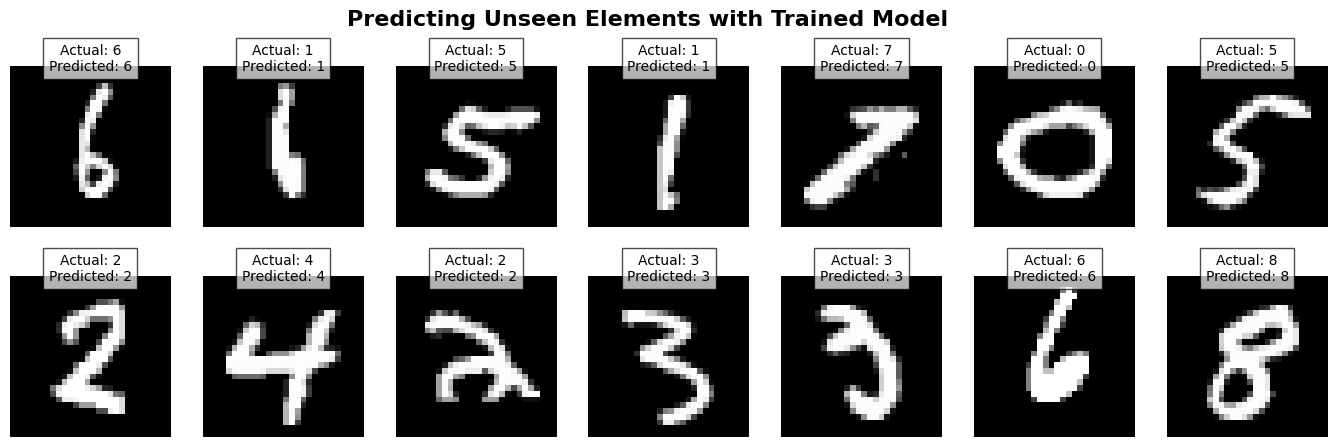

In [ ]:
# enabling numpy behavior in TensorFlow
tf.experimental.numpy.experimental_enable_numpy_behavior()

# creating a 2x7 subplot
fig, axes = plt.subplots(2, 7, figsize=(17, 5))

for i, ax in enumerate(axes.flat):

    # plotting each digit
    ax.imshow(X_final[i].reshape(28, 28), cmap='gray')

    # adding actual and predicted class labels
    actual_class = y_final[i]
    predicted_class = y_pred_classes[i]
    ax.text(0.5, 1.05, f'Actual: {actual_class}\nPredicted: {predicted_class}',
            transform=ax.transAxes, ha='center', va='center', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))

    ax.axis('off')

# adding a title over the entire plot
fig.suptitle('Predicting Unseen Elements with Trained Model', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# Save the model to a specified path
model.save('mnist_cnn_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('mnist_cnn_model.h5')


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset (or your own dataset)
(x_test, y_test), (_, _) = mnist.load_data()
x_test = np.expand_dims(x_test, axis=-1)  # Add channel dimension
x_test = x_test.astype('float32') / 255.0  # Normalize to [0, 1]

# Optionally, select a few samples to predict
sample_indices = np.random.choice(x_test.shape[0], size=5, replace=False)
sample_images = x_test[sample_indices]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Make predictions
predictions = model.predict(sample_images)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
Predicted classes: [8 0 2 4 4]


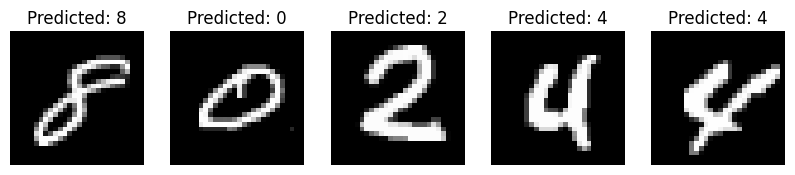

In [ ]:
import matplotlib.pyplot as plt

# Plotting the sample images and their predicted classes
plt.figure(figsize=(10, 5))
for i in range(len(sample_images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('mnist_cnn_model.h5')

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    img_resized = cv2.resize(gray, (28, 28))

    # Normalize and reshape the image
    img_normalized = img_resized.astype('float32') / 255.0
    img_reshaped = np.expand_dims(img_normalized, axis=(0, -1))  # Shape: (1, 28, 28, 1)

    # Make predictions
    predictions = model.predict(img_reshaped)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Display the resulting frame with predicted class
    cv2.putText(frame, f'Predicted: {predicted_class}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Show the frame
    cv2.imshow('Webcam', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()
